# Model Building

In [17]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# read in data
df = pd.read_csv('nba_salary_cleaned.csv')
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,Precious Achiuwa,PF,21,MIA,61,4,737,124,228,0,...,73,135,208,29,20,28,43,91,304,2582160
1,Jaylen Adams,PG,24,MIL,7,0,18,1,8,0,...,0,3,3,2,0,0,0,1,2,449115
2,Steven Adams,C,27,NOP,58,58,1605,189,308,0,...,213,301,514,111,54,38,78,113,438,29592695
3,Bam Adebayo,C,23,MIA,64,64,2143,456,800,2,...,142,431,573,346,75,66,169,145,1197,5115492
4,LaMarcus Aldridge,C,35,TOT,26,23,674,140,296,31,...,19,99,118,49,11,29,27,47,352,17628340


In [19]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA',
       '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'Salary'],
      dtype='object')

In [20]:
# choose the columns to use
df_model = df[['Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 
                   'BLK', 'TOV', 'PF', 'PTS', 'Salary']]

In [21]:
df_model.head()

,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,PF,21,MIA,61,4,737,124,228,0,1,...,73,135,208,29,20,28,43,91,304,2582160
1,PG,24,MIL,7,0,18,1,8,0,2,...,0,3,3,2,0,0,0,1,2,449115
2,C,27,NOP,58,58,1605,189,308,0,3,...,213,301,514,111,54,38,78,113,438,29592695
3,C,23,MIA,64,64,2143,456,800,2,8,...,142,431,573,346,75,66,169,145,1197,5115492
4,C,35,TOT,26,23,674,140,296,31,80,...,19,99,118,49,11,29,27,47,352,17628340


In [22]:
# get dummy variables for categorical variables
df_dum = pd.get_dummies(df_model, drop_first = True)

In [24]:
# test train split
from sklearn.model_selection import train_test_split

x =  df_dum.drop('Salary', axis = 1)
y = df_dum.Salary.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
x_train.shape

(373, 55)

In [27]:
y_train.shape

(373,)

In [29]:
x_test.shape

(94, 55)

In [30]:
y_test.shape

(94,)

In [33]:
# building linear model using statsmodel 
import statsmodels.api as sm
x_train = sm.add_constant(x_train)

This is a underlying basic model that I compare with other models

In [37]:
model = sm.OLS(y_train,x_train)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     15.55
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           1.03e-60
Time:                        14:13:05   Log-Likelihood:                -6284.7
No. Observations:                 373   AIC:                         1.267e+04
Df Residuals:                     321   BIC:                         1.288e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.106e+07   2.89e+06     -3.833      0.000   -1.67e+07   -5.38e+06
Age         6.122e+05   8.15e+04      7.508      0.000    4.52e+05    7.73e+05
G          -4.238e+04   4.25e+04     -0.997      0.320   -1.26e+05    4.13e+04
GS           1.27e+05   3.03e+04      4.191      0.000    6.74e+04    1.87e+05
MP         -1.205e+04   2861.448     -4.212      0.000   -1.77e+04   -6423.950
FG         -8275.8102   1.06e+04     -0.777      0.437   -2.92e+04    1.27e+04
FGA         9070.6277   6543.312      1.386      0.167   -3802.564    2.19e+04
3P          1.077e+04   2.33e+04      0.463      0.644    -3.5e+04    5.65e+04
3PA          589.9510    1.4e+04      0.042      0.966   -2.69e+04    2.81e+04
2P         -1.905e+04   2.67e+04     -0.714      0.476   -7.15e+04    3.34e+04
2PA         8480.6767    1.2e+04      0.705      0.481   -1.52e+04    3.21e+04
FT          1.741e+04      3e+04      0.580      0.563   -4.17e+04    7.65e+04
FTA        -1.342e+04   2.87e+04     -0.467      0.641      -7e+04    4.31e+04
ORB        -1099.8325   1.29e+04     -0.085      0.932   -2.65e+04    2.43e+04
DRB         1.196e+04   8953.175      1.336      0.183   -5653.303    2.96e+04
TRB         1.086e+04   5478.115      1.983      0.048      83.633    2.16e+04
AST         3.037e+04   8783.834      3.457      0.001    1.31e+04    4.76e+04
STL         5.029e+04   2.88e+04      1.747      0.082   -6354.722    1.07e+05
BLK         5.165e+04   2.22e+04      2.323      0.021    7913.453    9.54e+04
TOV         6366.6092   2.49e+04      0.256      0.798   -4.25e+04    5.53e+04
PF          -3.32e+04    1.5e+04     -2.220      0.027   -6.26e+04   -3776.528
PTS         1.163e+04   9509.407      1.223      0.222   -7081.560    3.03e+04
Pos_PF      1.381e+06   1.12e+06      1.229      0.220    -8.3e+05    3.59e+06
Pos_PG     -2.703e+05   1.32e+06     -0.205      0.838   -2.87e+06    2.33e+06
Pos_SF      7.372e+05   1.21e+06      0.611      0.541   -1.64e+06    3.11e+06
Pos_SG     -1.737e+05   1.25e+06     -0.139      0.890   -2.63e+06    2.29e+06
Tm_BOS       1.26e+06   2.35e+06      0.537      0.592   -3.36e+06    5.88e+06
Tm_BRK     -1.632e+06   2.29e+06     -0.714      0.476   -6.13e+06    2.87e+06
Tm_CHI     -2.495e+06   2.54e+06     -0.984      0.326   -7.48e+06    2.49e+06
Tm_CHO     -7.417e+05   2.27e+06     -0.327      0.744   -5.21e+06    3.73e+06
Tm_CLE     -5.569e+05   2.47e+06     -0.225      0.822   -5.42e+06     4.3e+06
Tm_DAL     -2.225e+05   2.48e+06     -0.090      0.929    -5.1e+06    4.66e+06
Tm_DEN     -6.526e+05   2.48e+06     -0.263      0.793   -5.54e+06    4.23e+06
Tm_DET     -8.075e+05   2.35e+06     -0.344      0.731   -5.43e+06    3.82e+06
Tm_GSW      3.944e+05   2.39e+06      0.165      0.869    -4.3e+06    5.09e+06
Tm_HOU      6.317e+05   2.61e+06      0.242      0.809   -4.51e+06    5.77e+06
Tm

Let's try sklearn linear regression next.
I am going to use cross validation to compare the scores of models

In [59]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score

reg = LinearRegression()

In [73]:
np.mean(cross_val_score(reg, x_train, y_train, cv=5))

0.5225314491906369

/Users/kaichi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.548e+15, tolerance: 2.764e+12
  model = cd_fast.enet_coordinate_descent(
/Users/kaichi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.235e+15, tolerance: 2.494e+12
  model = cd_fast.enet_coordinate_descent(
/Users/kaichi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

/Users/kaichi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.548e+15, tolerance: 2.764e+12
  model = cd_fast.enet_coordinate_descent(
/Users/kaichi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.234e+15, tolerance: 2.494e+12
  model = cd_fast.enet_coordinate_descent(
/Users/kaichi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

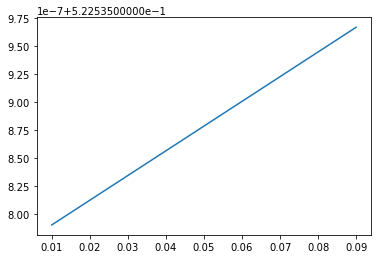

In [74]:
# Lasso Regression
# Need to choose the best alpha value
alpha_lasso = []
error_lasso = []

for i in range(1, 10):
    alpha_lasso.append(i/100)
    lml = Lasso(alpha = (i/100))
    error_lasso.append(np.mean(cross_val_score(lml, x_train, y_train, cv=5)))

plt.plot(alpha_lasso, error_lasso)

Seems like Lasso is not suitable for this case. Let's try Ridge regression

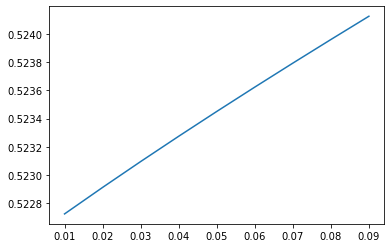

In [76]:
# Ridge Regression
# Need to choose the best alpha value
alpha_ridge = []
error_ridge = []

for i in range(1, 10):
    alpha_ridge.append(i/100)
    lmr = Ridge(alpha = (i/100))
    error_ridge.append(np.mean(cross_val_score(lmr, x_train, y_train, cv=5)))

plt.plot(alpha_ridge, error_ridge)

In [77]:
reg_lasso = Lasso(alpha = 0)
reg_ridge = Ridge(alpha = 0)

In [80]:
np.mean(cross_val_score(reg_lasso, x_train, y_train, cv=5))

/Users/kaichi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/kaichi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/kaichi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.548e+15, tolerance: 2.764e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_

0.5225357682759685

In [81]:
np.mean(cross_val_score(reg_ridge, x_train, y_train, cv=5))

0.23026738858606816

In [82]:
cross_val_score(reg_ridge, x_train, y_train, cv=5)

array([ 0.43631628,  0.51400943,  0.23135947,  0.59251995, -0.62286819])